<a href="https://colab.research.google.com/github/Athul64/ML-Assignment-5-Clustering/blob/main/ML_Assignment_5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Required Libraries**

In [89]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced statistical visualizations

# Import machine learning and clustering-related modules
from sklearn.datasets import load_iris  # Load the built-in Iris dataset
from sklearn.preprocessing import StandardScaler  # Standardize features by removing mean and scaling to unit variance
from sklearn.cluster import KMeans, AgglomerativeClustering  # Clustering algorithms: K-Means & Hierarchical Clustering
from sklearn.metrics import silhouette_score  # Metric to evaluate clustering performance

# Import hierarchical clustering functions
from scipy.cluster.hierarchy import dendrogram, linkage  # For creating dendrograms and hierarchical clustering

In [90]:
# Load the dataset
data = load_iris()

# Convert features to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the species variable
df['species'] = data.target

# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
# Make a copy to avoid modifying the original data
# Drop the 'species' column
df_cleaned = df.drop(columns=['species']).copy()

# Display the first few rows
df_cleaned.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
# Display the number of rows and columns
print("The Number of Rows :", df_cleaned.shape[0])
print("The Number of Columns :", df_cleaned.shape[1])

The Number of Rows : 150
The Number of Columns : 4


In [93]:
# provides an overview of the DataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [94]:
# statistics that summarize of the dataset
df_cleaned.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
# Checking for missing values
df_cleaned.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [96]:
# Check for duplicated values
print(f'Number Duplicated Entry Present in the Dataset Before Drop :',df_cleaned.duplicated().sum())
df_cleaned.drop_duplicates(inplace=True)
print(f'Number Duplicated Entry Present in the Dataset After Drop :',df_cleaned.duplicated().sum())

Number Duplicated Entry Present in the Dataset Before Drop : 1
Number Duplicated Entry Present in the Dataset After Drop : 0


## **Data Loading & Preprocessing**

* Loads the Iris dataset using `sklearn.datasets.load_iris()`.
* Converts the dataset into a Pandas DataFrame and removes the species column for clustering.
* Checks for missing values and duplicates, removing duplicates if present.

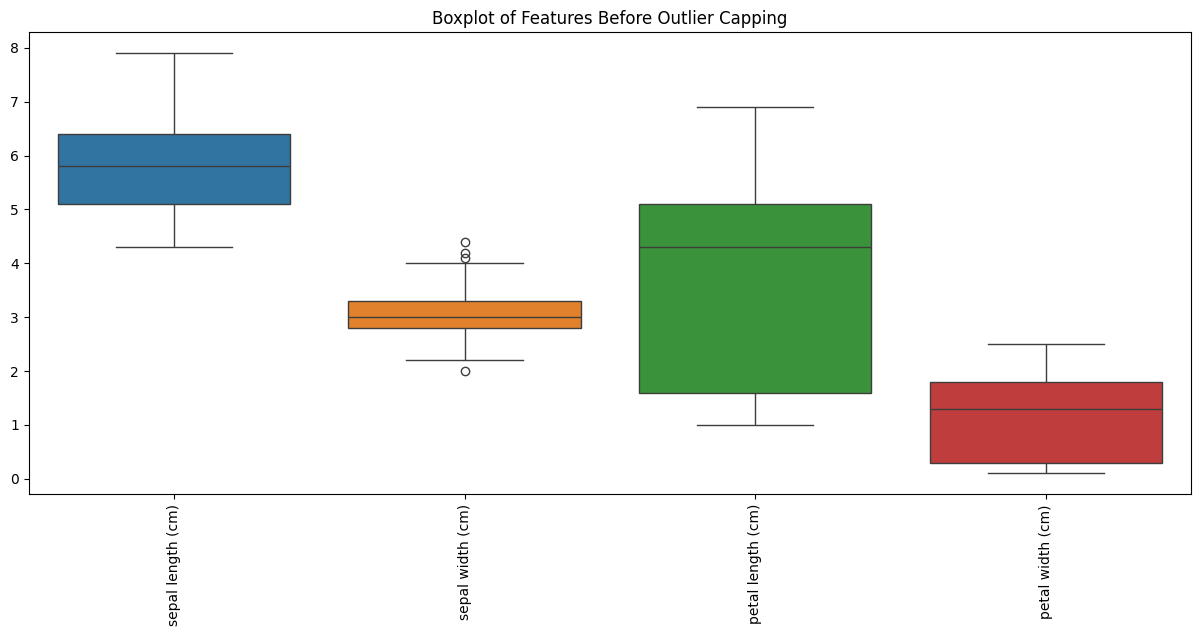

In [97]:
# Plot boxplots for Detect the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned.iloc[:, :4])  # First 10 features
plt.xticks(rotation=90)
plt.title("Boxplot of Features Before Outlier Capping")
plt.show()

In [98]:
def cap_outliers(df_cleaned, col):
  for i in col:
    Q1 = np.quantile(df_cleaned[i], 0.25)
    Q3 = np.quantile(df_cleaned[i], 0.75)
    IQR = Q3 - Q1

    # Define capping limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Applying capping
    df_cleaned[i] = np.where(df_cleaned[i] < lower_bound, lower_bound, df_cleaned[i])
    df_cleaned[i] = np.where(df_cleaned[i] > upper_bound, upper_bound, df_cleaned[i])

  return df_cleaned


# List of columns to cap
outlier_col = ['sepal width (cm)']

# Apply function
df_cleaned = cap_outliers(df_cleaned, outlier_col)

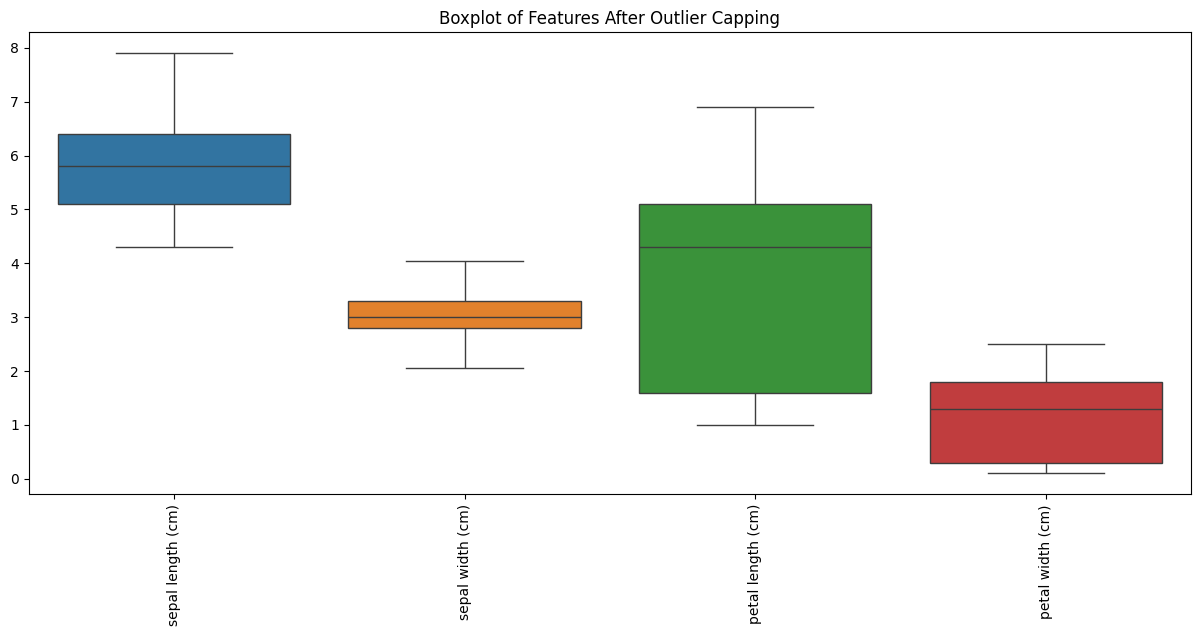

In [99]:
# Plot boxplots for Detect the Outliers After IQR method
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned.iloc[:, :4])  # First 10 features
plt.xticks(rotation=90)
plt.title("Boxplot of Features After Outlier Capping")
plt.show()

## **Outlier Detection & Capping**
* Uses boxplots to detect outliers in the features.
* Applies `Interquartile Range (IQR)` method to cap outliers, ensuring the dataset is not skewed by extreme values.

In [100]:
# Skewness before outlier capping
print("Skewness before outlier capping:")
print(df.select_dtypes(include=['float64']).skew())

# Skewness after outlier capping
print("\nSkewness after outlier capping:")
print(df_cleaned.select_dtypes(include=['float64']).skew())

Skewness before outlier capping:
sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

Skewness after outlier capping:
sepal length (cm)    0.312826
sepal width (cm)     0.182187
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64


In [101]:
# Apply log transformation for Sepal Length (better result)
df_cleaned['sepal length (cm)'] = np.log1p(df_cleaned['sepal length (cm)'])

# Apply sqrt transformation for Sepal Width (better result)
df_cleaned['sepal width (cm)'] = np.sqrt(df_cleaned['sepal width (cm)'])

# Skewness after outlier capping
print("\nSkewness Before outlier capping & Log, Sqrt Transformation:")
print(df.select_dtypes(include=['float64']).skew())

# Compute skewness AFTER log & Sqrt transformation
print("\nSkewness After Log & Sqrt Transformation:")
print(df_cleaned.select_dtypes(include=['float64']).skew())


Skewness Before outlier capping & Log, Sqrt Transformation:
sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

Skewness After Log & Sqrt Transformation:
sepal length (cm)    0.082459
sepal width (cm)    -0.007125
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64


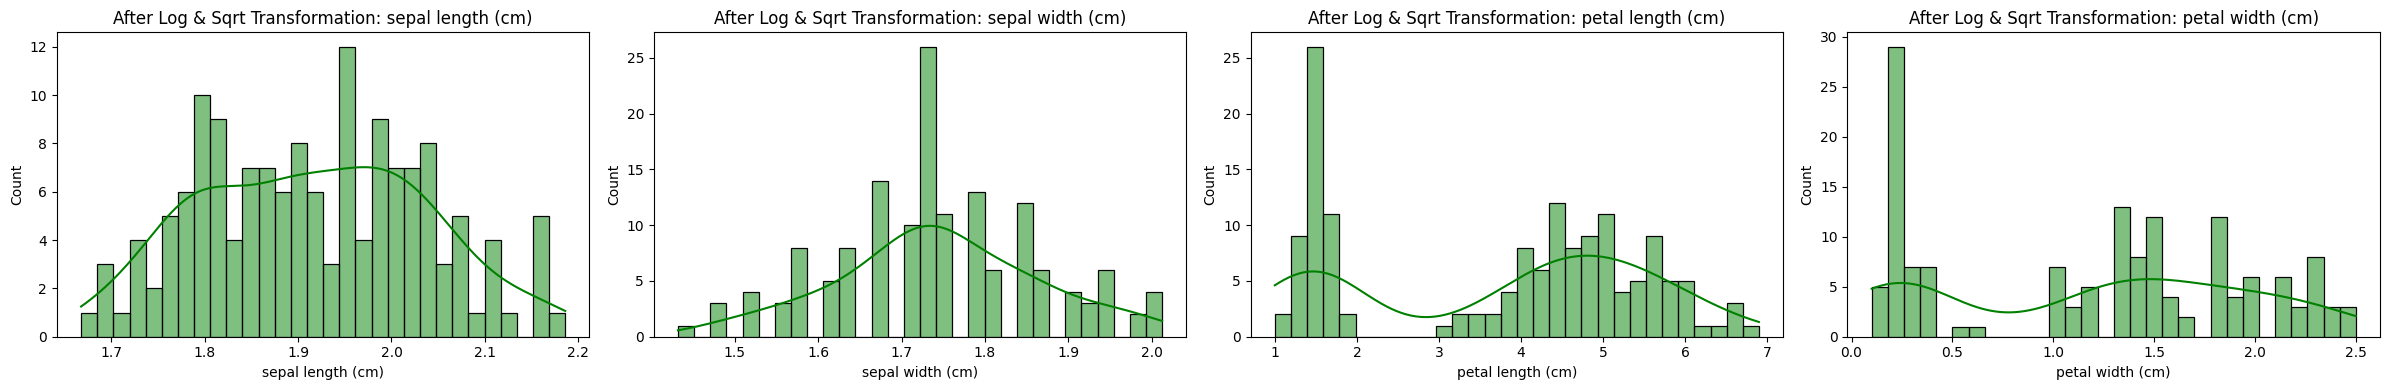

In [102]:
# Visulization Before & After Capping
skew_col = df_cleaned.select_dtypes(include=['float64']).columns

# Final visualization after log transformation
fig, axes = plt.subplots(1, len(skew_col), figsize=(len(skew_col) * 6, 4))  # 1 row, multiple columns

for i, col in enumerate(skew_col):
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='green', ax=axes[i])
    axes[i].set_title(f"After Log & Sqrt Transformation: {col}")

plt.tight_layout()
plt.show()

## **Skewness Handling & Data Transformation :**

* Computes skewness before and after transformations.
* Uses log transformation for sepal length and square root transformation for sepal width to make distributions more normal.
* Visualizes the effect of transformations using histograms.

In [103]:
# Standardizing the data for better clustering
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled, columns=df_cleaned.columns)
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.895454,1.043129,-1.333255,-1.308624
1,-1.172446,-0.098436,-1.333255,-1.308624
2,-1.458991,0.368821,-1.390014,-1.308624
3,-1.606057,0.137077,-1.276496,-1.308624
4,-1.032796,1.261425,-1.333255,-1.308624
...,...,...,...,...
144,1.039972,-0.098436,0.823571,1.454321
145,0.596720,-1.339814,0.710054,0.928046
146,0.821301,-0.098436,0.823571,1.059614
147,0.482112,0.821691,0.937088,1.454321


## **Feature Scaling**

* Standardizes the dataset using StandardScaler() to ensure all features have equal importance.

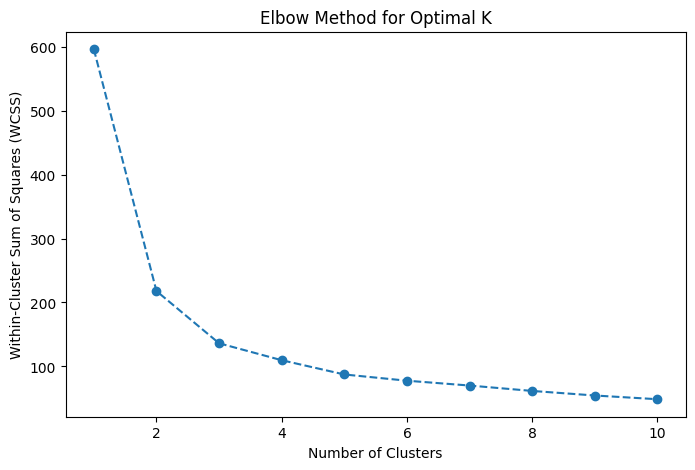

In [104]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

## **Finding the Optimal Number of Clusters**

* Uses the Elbow Method to determine the best number of clusters for K-Means by plotting Within-Cluster Sum of Squares (WCSS).
* `K-Means = n_clusters=3`

In [105]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

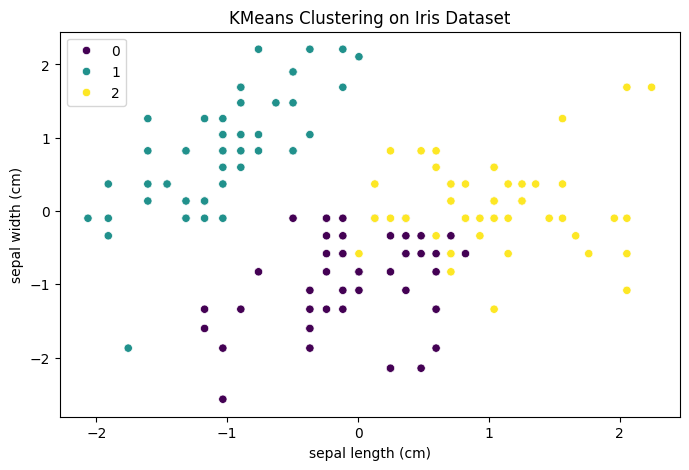

In [106]:
# Visualizing the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.legend()
plt.show()

## **K-Means Clustering**

* Applies K-Means clustering with` n_clusters=3`.
* Visualizes the clusters using a scatter plot.

In [107]:
# Applying Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_scaled['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

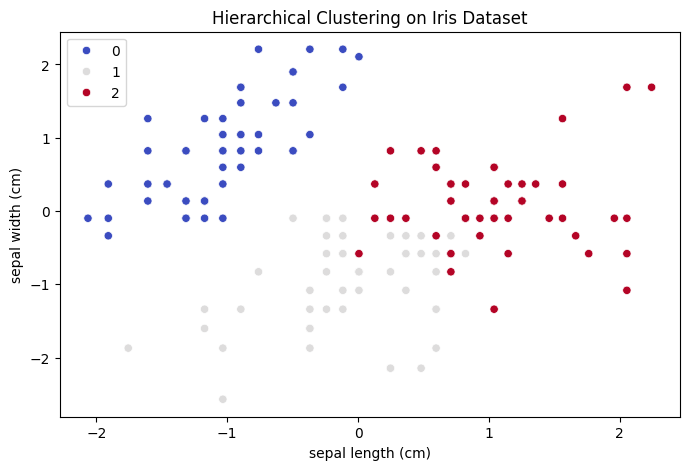

In [108]:
# Visualizing the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.legend()
plt.show()

## **Hierarchical Clustering**

* Applies Agglomerative Clustering with `n_clusters=3`.
* Visualizes the results with a scatter plot.

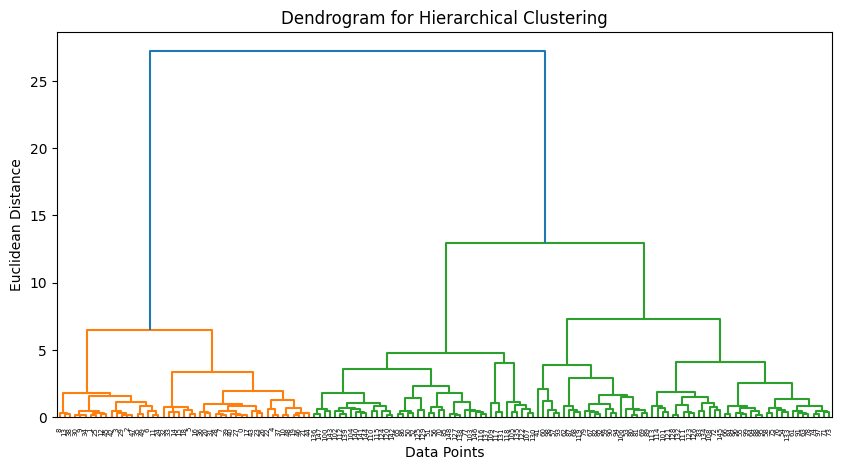

In [109]:
# Dendrogram for Hierarchical Clustering (computed on scaled data without cluster labels)
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster']), method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

## **Hierarchical Clustering Dendrogram**

* Creates a dendrogram to visualize the hierarchical clustering process.

In [110]:
# Compute silhouette score correctly
silhouette_avg_kmeans = silhouette_score(df_scaled.drop(columns=['KMeans_Cluster']), df_scaled['KMeans_Cluster'])
print("Silhouette Score of KMeans Cluster:", silhouette_avg_kmeans)

silhouette_avg_hierarchical = silhouette_score(df_scaled.drop(columns=['Hierarchical_Cluster']), df_scaled['Hierarchical_Cluster'])
print("Silhouette Score of Hierarchical Cluster:", silhouette_avg_hierarchical)

Silhouette Score of KMeans Cluster: 0.5200823338970033
Silhouette Score of Hierarchical Cluster: 0.5978571703981572


## **Evaluating Clustering Performance**

* Computes the `Silhouette Score`**bold text** for both `K-Means` and `Hierarchical` clustering to measure how well the clusters are formed.
* Silhouette Score for K-Means Cluster: `0.5201`
* Silhouette Score for Hierarchical Cluster: `0.5979`